# TP MACHINE LEARNING

## 1. The Dataset : CIFAR-3

* Importation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, svm, metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

X=np.load('X_cifar.npy')
np.shape(X)

(18000, 32, 32, 3)

In [3]:
Y=np.load('Y_cifar.npy')
X_gray= np.load('X_cifar_grayscale.npy')
print(f"shape de X_gray :{np.shape(X_gray)}")
print(f"shape de Y :{np.shape(Y)}")
print(f"shape de X :{np.shape(X)}")



shape de X_gray :(18000, 32, 32)
shape de Y :(18000,)
shape de X :(18000, 32, 32, 3)


Y n'est qu'un tableau de 18 000 valeurs qui represente les labels de nos entrées qui sont classifiées avec des valeurs de 0 à 2.
X represente des images de taille 32 par 32 en couleur d'où le 3.
X_gray est le X en nuance de gris.

In [4]:
min_value = np.min(X)
max_value = np.max(X)

print(f"Valeur minimale: {min_value}")
print(f"Valeur maximale: {max_value}")

Valeur minimale: 0
Valeur maximale: 255


Nous allons normaliser les valeurs car des plus petites valeurs est préférable pour la convergence des modèles. Pour cela nous pouvons faire :

In [5]:
X_norm = X/255.
X_gray_norm = X_gray/255.


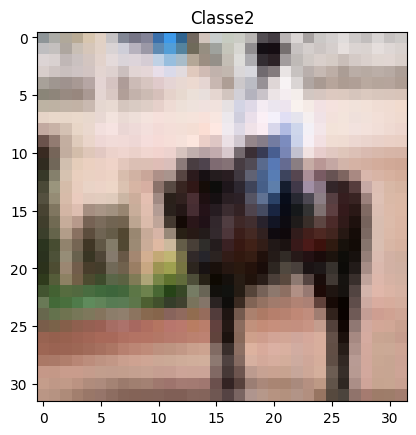

<Figure size 640x480 with 0 Axes>

In [6]:
plt.imshow(X[5])
img_title='Classe' + str(Y[5])
plt.title(img_title)
plt.show()
plt.clf()


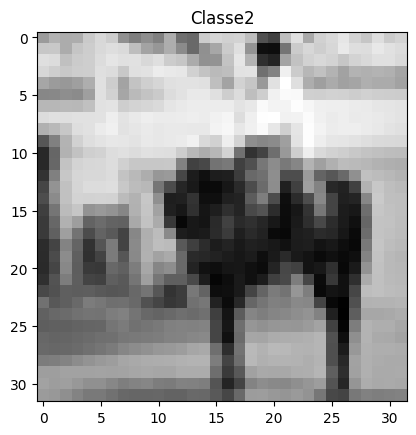

<Figure size 640x480 with 0 Axes>

In [7]:
plt.imshow(X_gray_norm[5],cmap='gray')
img_title='Classe' + str(Y[5])
plt.title(img_title)
plt.show()
plt.clf()


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm,Y,test_size=0.3)
print(f"shape de X_train :{np.shape(X_train)}")
print(f"shape de X_test :{np.shape(X_test)}")
print(f"shape de Y_train :{np.shape(Y_train)}")
print(f"shape de Y_test :{np.shape(Y_test)}")



shape de X_train :(12600, 32, 32, 3)
shape de X_test :(5400, 32, 32, 3)
shape de Y_train :(12600,)
shape de Y_test :(5400,)


In [9]:
print(f"% de 0 dans Y_train : {len(Y_train[Y_train == 0])}  ")
print(f"% de 0 dans Y_test : {len(Y_test[Y_test == 0])}")
print(f"% de 1 dans Y_train : {len(Y_train[Y_train == 1])}")
print(f"% de 1 dans Y_test : {len(Y_test[Y_test == 1])}")
print(f"% de 2 dans Y_train : {len(Y_train[Y_train == 2])}")
print(f"% de 2 dans Y_test : {len(Y_test[Y_test == 2])}")

% de 0 dans Y_train : 4132  
% de 0 dans Y_test : 1868
% de 1 dans Y_train : 4265
% de 1 dans Y_test : 1735
% de 2 dans Y_train : 4203
% de 2 dans Y_test : 1797


In [10]:
print(f"% de 0 dans Y_train : {len(Y_train[Y_train == 0])/len(Y_train)}  ")
print(f"% de 0 dans Y_test : {len(Y_test[Y_test == 0])/len(Y_test)}")
print(f"% de 1 dans Y_train : {len(Y_train[Y_train == 1])/len(Y_train)}")
print(f"% de 1 dans Y_test : {len(Y_test[Y_test == 1])/len(Y_test)}")
print(f"% de 2 dans Y_train : {len(Y_train[Y_train == 2])/len(Y_train)}")
print(f"% de 2 dans Y_test : {len(Y_test[Y_test == 2])/len(Y_test)}")

% de 0 dans Y_train : 0.3279365079365079  
% de 0 dans Y_test : 0.3459259259259259
% de 1 dans Y_train : 0.3384920634920635
% de 1 dans Y_test : 0.3212962962962963
% de 2 dans Y_train : 0.3335714285714286
% de 2 dans Y_test : 0.3327777777777778


Le dataset est équilibré, en effet nous avons a peu pres 33% pour chaque label dans chacun des datasets. Ceci permet un bon apprantissage

## 2.DIMENSIONALITY REDUCTION WITH THE PCA

shape de X_4 :(18000, 32, 32, 3)


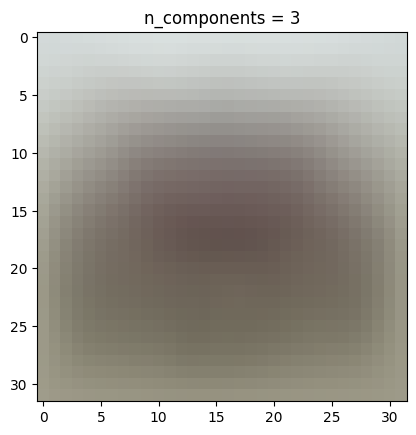

0.4392044730171485


In [11]:
X_reshape=np.reshape(X_norm,(18000,32*32*3))
n_components = 3
pca = PCA(n_components=3)
X_2=pca.fit_transform(X_reshape)
pca.explained_variance_ratio_.sum()
X_3=pca.inverse_transform(X_2)
X_4=np.reshape(X_3,(18000,32,32,3))
print(f"shape de X_4 :{np.shape(X_4)}")
X_4[0,0,0,:]
plt.imshow(X_4[5])
img_title = 'n_components = ' + str(n_components)  # Assurez-vous que Y est défini correctement
plt.title(img_title)
plt.show()
print(sum(pca.explained_variance_ratio_))

Il faudrait que la somme de la variance soit à 0.95 ce qui permetrait de conserver 95% de fidélité

[0.2610144  0.11144152 0.06674856]


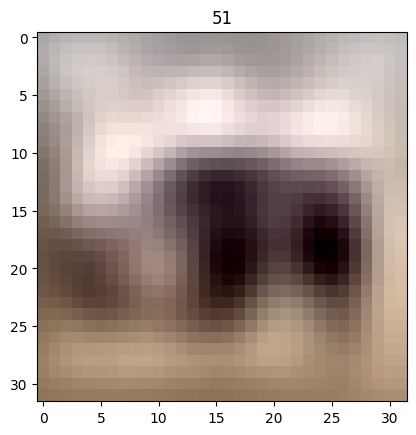

0.8265456747047434


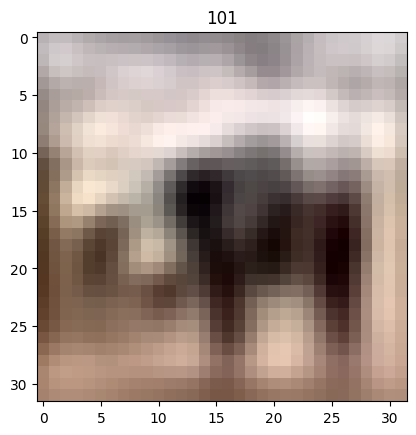

0.8893279577481858


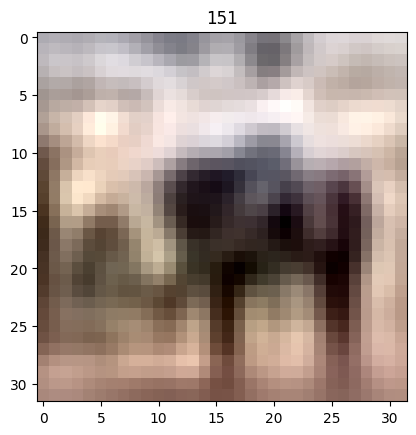

0.9202829295350505


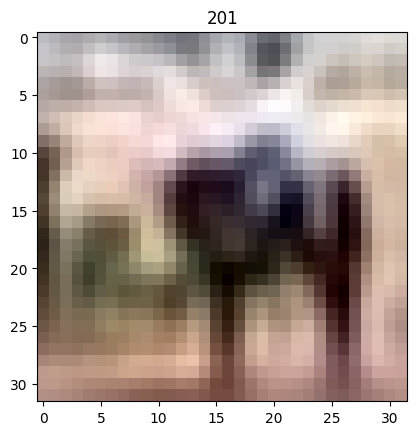

0.9393359883157858


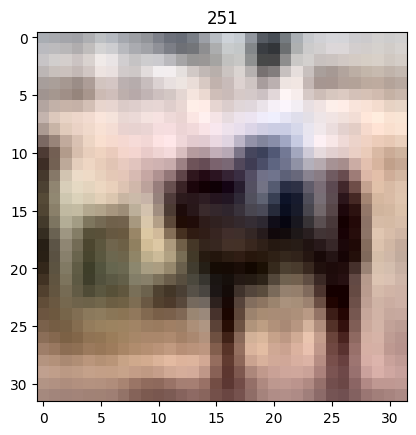

0.9522634954552264


<Figure size 640x480 with 0 Axes>

In [12]:
n=1
print(pca.explained_variance_ratio_)
while(sum(pca.explained_variance_ratio_)<0.95):
    n+=50

    pca = PCA(n_components=n)
    X_2=pca.fit_transform(X_reshape)
    pca.explained_variance_ratio_.sum()
    X_3=pca.inverse_transform(X_2)
    X_4=np.reshape(X_3,(18000,32,32,3))
    plt.imshow(X_4[5])
    img_title=n
    plt.title(img_title)
    plt.show()
    plt.clf()
    print(sum(pca.explained_variance_ratio_))




n_components = 251 garde donc assez de variance pour etre représentative du dataset initial

## 3.1 Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
X_gray_train, X_gray_test, Y_train, Y_test = train_test_split(X_gray_norm,Y,test_size=0.3)
print(np.shape(X_gray_train))
print(np.shape(X_gray_test))
X1new_train=np.reshape(X_gray_train,(12600,32*32))
X1new_test=np.reshape(X_gray_test,(5400,32*32))
lr=LogisticRegression(random_state=0, max_iter=2000)
lr.fit(X1new_train, Y_train)
print(lr.predict(X1new_train))
print(lr.predict(X1new_test))
print(lr.score(X1new_test, Y_test))
print(lr.score(X1new_train, Y_train))


(12600, 32, 32)
(5400, 32, 32)
[1 2 2 ... 2 2 1]
[1 0 0 ... 0 1 0]
0.5890740740740741
0.6661904761904762


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
X_gray_train, X_gray_test, Y_train, Y_test = train_test_split(X_gray_norm,Y,test_size=0.3)
print(np.shape(X_gray_train))
print(np.shape(X_gray_test))
X1new_train=np.reshape(X_gray_train,(12600,32*32))
X1new_test=np.reshape(X_gray_test,(5400,32*32))
lr=LogisticRegression(random_state=0, max_iter=2000)
lr.fit(X1new_train, Y_train)
print(lr.predict(X1new_train))
print(lr.predict(X1new_test))
print(lr.score(X1new_test, Y_test))
print(lr.score(X1new_train, Y_train))


(12600, 32, 32)
(5400, 32, 32)
[2 0 1 ... 1 1 0]
[1 1 1 ... 2 0 0]
0.5792592592592593
0.6635714285714286


### Try different solver

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
X_gray_train, X_gray_test, Y_train, Y_test = train_test_split(X_gray_norm,Y,test_size=0.3)
print(np.shape(X_gray_train))
print(np.shape(X_gray_test))
X1new_train=np.reshape(X_gray_train,(12600,32*32))
X1new_test=np.reshape(X_gray_test,(5400,32*32))
lr=LogisticRegression(random_state=0, max_iter=1000, solver='liblinear')
lr.fit(X1new_train, Y_train)
print(lr.predict(X1new_train))
print(lr.predict(X1new_test))
print(lr.score(X1new_test, Y_test))
print(lr.score(X1new_train, Y_train))


(12600, 32, 32)
(5400, 32, 32)
[0 1 1 ... 0 0 1]
[0 2 2 ... 1 2 2]
0.5846296296296296
0.658015873015873


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
X_gray_train, X_gray_test, Y_train, Y_test = train_test_split(X_gray_norm,Y,test_size=0.3)
print(np.shape(X_gray_train))
print(np.shape(X_gray_test))
X1new_train=np.reshape(X_gray_train,(12600,32*32))
X1new_test=np.reshape(X_gray_test,(5400,32*32))
lr=LogisticRegression(random_state=0, max_iter=1000, solver='newton-cg')
lr.fit(X1new_train, Y_train)
print(lr.predict(X1new_train))
print(lr.predict(X1new_test))
print(lr.score(X1new_test, Y_test))
print(lr.score(X1new_train, Y_train))


(12600, 32, 32)
(5400, 32, 32)
[0 0 2 ... 0 0 2]
[0 2 0 ... 0 1 2]
0.5787037037037037
0.6656349206349207


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
X_gray_train, X_gray_test, Y_train, Y_test = train_test_split(X_gray_norm,Y,test_size=0.3)
print(np.shape(X_gray_train))
print(np.shape(X_gray_test))
X1new_train=np.reshape(X_gray_train,(12600,32*32))
X1new_test=np.reshape(X_gray_test,(5400,32*32))
lr=LogisticRegression(random_state=0, max_iter=1000, solver='sag')
lr.fit(X1new_train, Y_train)
print(lr.predict(X1new_train))
print(lr.predict(X1new_test))
print(lr.score(X1new_test, Y_test))
print(lr.score(X1new_train, Y_train))


(12600, 32, 32)
(5400, 32, 32)
[2 2 0 ... 0 0 1]
[2 2 1 ... 1 0 2]
0.5731481481481482
0.6646031746031746


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
X_gray_train, X_gray_test, Y_train, Y_test = train_test_split(X_gray_norm,Y,test_size=0.3)
print(np.shape(X_gray_train))
print(np.shape(X_gray_test))
X1new_train=np.reshape(X_gray_train,(12600,32*32))
X1new_test=np.reshape(X_gray_test,(5400,32*32))
lr=LogisticRegression(random_state=0, max_iter=1000, solver='saga')
lr.fit(X1new_train, Y_train)
print(lr.predict(X1new_train))
print(lr.predict(X1new_test))
print(lr.score(X1new_test, Y_test))
print(lr.score(X1new_train, Y_train))


(12600, 32, 32)
(5400, 32, 32)
[0 2 1 ... 0 2 1]
[0 0 2 ... 0 1 1]
0.580925925925926
0.6658730158730158


### Gaussian classififcation

In [19]:
clf = GaussianNB()
clf.fit(X1new_train, Y_train)
print(clf.predict(X1new_train))
print(clf.predict(X1new_test))
print(clf.score(X1new_test, Y_test))
print(clf.score(X1new_train, Y_train))

[1 1 1 ... 0 1 1]
[0 2 2 ... 2 2 1]
0.5840740740740741
0.5854761904761905


In [20]:
clf = GaussianNB(var_smoothing = 1e-12)
clf.fit(X1new_train, Y_train)
print(clf.predict(X1new_train))
print(clf.predict(X1new_test))
print(clf.score(X1new_test, Y_test))
print(clf.score(X1new_train, Y_train))

[1 1 1 ... 0 1 1]
[0 2 2 ... 2 2 1]
0.5840740740740741
0.5854761904761905


In [21]:
clf = GaussianNB(var_smoothing = 1e-04)
clf.fit(X1new_train, Y_train)
print(clf.predict(X1new_train))
print(clf.predict(X1new_test))
print(clf.score(X1new_test, Y_test))
print(clf.score(X1new_train, Y_train))

[1 1 1 ... 0 1 1]
[0 2 2 ... 2 2 1]
0.5842592592592593
0.5854761904761905


In [22]:
clf = GaussianNB(var_smoothing = 1e+02)
clf.fit(X1new_train, Y_train)
print(clf.predict(X1new_train))
print(clf.predict(X1new_test))
print(clf.score(X1new_test, Y_test))
print(clf.score(X1new_train, Y_train))

[1 1 1 ... 1 1 1]
[1 2 1 ... 1 1 1]
0.355
0.3601587301587302


In [23]:
clf = GaussianNB(var_smoothing = 1e-24)
clf.fit(X1new_train, Y_train)
print(clf.predict(X1new_train))
print(clf.predict(X1new_test))
print(clf.score(X1new_test, Y_test))
print(clf.score(X1new_train, Y_train))

[1 1 1 ... 0 1 1]
[0 2 2 ... 2 2 1]
0.5840740740740741
0.5854761904761905


### TEST WITH REDUCE DIMENSION DATASET

In [24]:
X_reshape=np.reshape(X_gray_norm,(18000,32*32))
pca = PCA(n_components=251)
X_2=pca.fit_transform(X_reshape)
pca.explained_variance_ratio_.sum()
X_3=pca.inverse_transform(X_2)
X_4_gray=np.reshape(X_3,(18000,32,32))
X_4_gray[0,0,:,]

array([0.10006039, 0.10022199, 0.11723185, 0.13908558, 0.12051169,
       0.1083237 , 0.11595998, 0.13379206, 0.12437238, 0.10387467,
       0.09594445, 0.10633182, 0.14313771, 0.17444842, 0.1723855 ,
       0.14495467, 0.12929094, 0.12824675, 0.11852201, 0.09925775,
       0.11061653, 0.15476479, 0.20262024, 0.2094797 , 0.191841  ,
       0.18531069, 0.17363369, 0.17487927, 0.19208819, 0.22158863,
       0.25292767, 0.26397895])

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
X_gray_train, X_gray_test, Y_train, Y_test = train_test_split(X_4_gray,Y,test_size=0.3)
print(np.shape(X_gray_train))
print(np.shape(X_gray_test))
X4new_train=np.reshape(X_gray_train,(12600,32*32))
X4new_test=np.reshape(X_gray_test,(5400,32*32))
lr=LogisticRegression(random_state=0, max_iter=2000)
lr.fit(X4new_train, Y_train)
print(lr.predict(X4new_train))
print(lr.predict(X4new_test))
print(lr.score(X4new_test, Y_test))
print(lr.score(X4new_train, Y_train))


(12600, 32, 32)
(5400, 32, 32)
[0 0 0 ... 0 2 1]
[1 0 1 ... 1 2 1]
0.6035185185185186
0.6301587301587301


In [26]:
clf = GaussianNB(var_smoothing = 1e-04)
clf.fit(X4new_train, Y_train)
print(clf.predict(X4new_train))
print(clf.predict(X4new_test))
print(clf.score(X4new_test, Y_test))
print(clf.score(X4new_train, Y_train))

[0 0 0 ... 1 2 1]
[1 0 1 ... 1 1 1]
0.5787037037037037
0.5856349206349206


In [27]:
clf = GaussianNB(var_smoothing = 1e-24)
clf.fit(X4new_train, Y_train)
print(clf.predict(X4new_train))
print(clf.predict(X4new_test))
print(clf.score(X4new_test, Y_test))
print(clf.score(X4new_train, Y_train))

[0 0 0 ... 1 2 1]
[1 0 1 ... 1 1 1]
0.5787037037037037
0.5856349206349206


## 3.2. Deep Learning / MULTILAYER PERCEPTRON (MLP)

### First TRY

In [ ]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

X=np.load('X_cifar_grayscale.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(3, activation='Softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train,epochs=50,validation_data=(X_test, Y_test))

print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

import matplotlib.pyplot as plt
plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Plot des valeurs de perte
ax1.plot(outputs.history['loss'], label='Train Loss')
ax1.plot(outputs.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

#Plot des valeurs d'accuracy
ax2.plot(outputs.history['categorical_accuracy'], label='Train Accuracy')
ax2.plot(outputs.history['val_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

#Affichage du graphe
plt.show()

### Overfitting avec 2 fois plus d'epoch et un petit batch_size

In [ ]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

X=np.load('X_cifar_grayscale.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.38),
  tf.keras.layers.Dense(3, activation='Softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train,epochs=100,batch_size = 60,validation_data=(X_test, Y_test))

print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Plot des valeurs de perte
ax1.plot(outputs.history['loss'], label='Train Loss')
ax1.plot(outputs.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

#Plot des valeurs d'accuracy
ax2.plot(outputs.history['categorical_accuracy'], label='Train Accuracy')
ax2.plot(outputs.history['val_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

#Affichage du graphe
plt.show()

### Optimisation

In [ ]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

X=np.load('X_cifar_grayscale.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.38),
  tf.keras.layers.Dense(3, activation='Softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train,epochs=50,validation_data=(X_test, Y_test))

print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Plot des valeurs de perte
ax1.plot(outputs.history['loss'], label='Train Loss')
ax1.plot(outputs.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

#Plot des valeurs d'accuracy
ax2.plot(outputs.history['categorical_accuracy'], label='Train Accuracy')
ax2.plot(outputs.history['val_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

#Affichage du graphe
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

X=np.load('X_cifar_grayscale.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(3, activation='Softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train,epochs=50,validation_data=(X_test, Y_test))

print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Plot des valeurs de perte
ax1.plot(outputs.history['loss'], label='Train Loss')
ax1.plot(outputs.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

#Plot des valeurs d'accuracy
ax2.plot(outputs.history['categorical_accuracy'], label='Train Accuracy')
ax2.plot(outputs.history['val_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

#Affichage du graphe
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

X=np.load('X_cifar_grayscale.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation='Softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train,epochs=50,validation_data=(X_test, Y_test))

print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Plot des valeurs de perte
ax1.plot(outputs.history['loss'], label='Train Loss')
ax1.plot(outputs.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

#Plot des valeurs d'accuracy
ax2.plot(outputs.history['categorical_accuracy'], label='Train Accuracy')
ax2.plot(outputs.history['val_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

#Affichage du graphe
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

X=np.load('X_cifar_grayscale.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.15),
  tf.keras.layers.Dense(3, activation='Softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train,epochs=100, batch_size = 3000,validation_data=(X_test, Y_test))

print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Plot des valeurs de perte
ax1.plot(outputs.history['loss'], label='Train Loss')
ax1.plot(outputs.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

#Plot des valeurs d'accuracy
ax2.plot(outputs.history['categorical_accuracy'], label='Train Accuracy')
ax2.plot(outputs.history['val_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

#Affichage du graphe
plt.show()

## CNN

En effet le CNN fonctionne mieux avec les images en général nous allons donc nous tourner vers cette solution

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

X=np.load('X_cifar.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(3, activation='Softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train,epochs=15,validation_data=(X_test, Y_test))

print("\n---Results---\n")
print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Plot des valeurs de perte
ax1.plot(outputs.history['loss'], label='Train Loss')
ax1.plot(outputs.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

#Plot des valeurs d'accuracy
ax2.plot(outputs.history['categorical_accuracy'], label='Train Accuracy')
ax2.plot(outputs.history['val_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

#Affichage du graphe
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

X=np.load('X_cifar.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.SpatialDropout2D(0.4),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(3, activation='Softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train,epochs=15,validation_data=(X_test, Y_test))

print("\n---Results---\n")
print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Plot des valeurs de perte
ax1.plot(outputs.history['loss'], label='Train Loss')
ax1.plot(outputs.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

#Plot des valeurs d'accuracy
ax2.plot(outputs.history['categorical_accuracy'], label='Train Accuracy')
ax2.plot(outputs.history['val_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

#Affichage du graphe
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

X=np.load('X_cifar.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(3, activation='Softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train,epochs=6,validation_data=(X_test, Y_test))

print("\n---Results---\n")
print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Plot des valeurs de perte
ax1.plot(outputs.history['loss'], label='Train Loss')
ax1.plot(outputs.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

#Plot des valeurs d'accuracy
ax2.plot(outputs.history['categorical_accuracy'], label='Train Accuracy')
ax2.plot(outputs.history['val_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

#Affichage du graphe
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

X=np.load('X_cifar.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.SpatialDropout2D(0.3),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.SpatialDropout2D(0.2),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.38),
  tf.keras.layers.Dense(3, activation='Softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train,epochs=15,validation_data=(X_test, Y_test))

print("\n---Results---\n")
print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Plot des valeurs de perte
ax1.plot(outputs.history['loss'], label='Train Loss')
ax1.plot(outputs.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

#Plot des valeurs d'accuracy
ax2.plot(outputs.history['categorical_accuracy'], label='Train Accuracy')
ax2.plot(outputs.history['val_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

#Affichage du graphe
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

X=np.load('X_cifar.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.SpatialDropout2D(0.3),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.SpatialDropout2D(0.2),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.38),
  tf.keras.layers.Dense(3, activation='Softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train,epochs=30,validation_data=(X_test, Y_test))

print("\n---Results---\n")
print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Plot des valeurs de perte
ax1.plot(outputs.history['loss'], label='Train Loss')
ax1.plot(outputs.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

#Plot des valeurs d'accuracy
ax2.plot(outputs.history['categorical_accuracy'], label='Train Accuracy')
ax2.plot(outputs.history['val_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

#Affichage du graphe
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

X=np.load('X_cifar.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.SpatialDropout2D(0.3),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
  tf.keras.layers.SpatialDropout2D(0.2),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.38),
  tf.keras.layers.Dense(3, activation='Softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train,epochs=30,validation_data=(X_test, Y_test))

print("\n---Results---\n")
print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Plot des valeurs de perte
ax1.plot(outputs.history['loss'], label='Train Loss')
ax1.plot(outputs.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

#Plot des valeurs d'accuracy
ax2.plot(outputs.history['categorical_accuracy'], label='Train Accuracy')
ax2.plot(outputs.history['val_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

#Affichage du graphe
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

X=np.load('X_cifar.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
  tf.keras.layers.SpatialDropout2D(0.2),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
  tf.keras.layers.SpatialDropout2D(0.35),
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.38),
  tf.keras.layers.Dense(3, activation='Softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train,epochs=30,validation_data=(X_test, Y_test))

print("\n---Results---\n")
print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Plot des valeurs de perte
ax1.plot(outputs.history['loss'], label='Train Loss')
ax1.plot(outputs.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

#Plot des valeurs d'accuracy
ax2.plot(outputs.history['categorical_accuracy'], label='Train Accuracy')
ax2.plot(outputs.history['val_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

#Affichage du graphe
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

X=np.load('X_cifar.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
  tf.keras.layers.SpatialDropout2D(0.2),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
  tf.keras.layers.SpatialDropout2D(0.35),
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.38),
  tf.keras.layers.Dense(3, activation='Softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

outputs = model.fit(X_train, Y_train,epochs=100,validation_data=(X_test, Y_test))

print("\n---Results---\n")
print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Plot des valeurs de perte
ax1.plot(outputs.history['loss'], label='Train Loss')
ax1.plot(outputs.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

#Plot des valeurs d'accuracy
ax2.plot(outputs.history['categorical_accuracy'], label='Train Accuracy')
ax2.plot(outputs.history['val_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

#Affichage du graphe
plt.show()

### Conclusion: Le but étant d'avoir un model qui donne de bon résultat en optimisant au plus les parametres pour avoir le model le plus leger possible et donc le moins énergivore possible et facilement embarquable